## 1. 데이터셋 로드

In [2]:
import os 

# HOUSING_PATH = 'datasets/housing' 

In [3]:
import pandas as pd

housing = pd.read_csv('housing.csv') # csv 파일을 읽습니다.

# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

In [4]:
# housing = load_housing_data()
housing.head(10) # housing의 10개 데이터 확인

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## 2. 데이터 분리 및 이해하기

In [5]:
# longitude: 경도 
# latitude: 위도
# housing_median_age: 중간 노후연식
# total_rooms: 방 개수
# total_bedrooms: 침실 개수
# population: 인구
# households: 새대
# median_income: 중간 수입
# median_house_value: 중간 집 값
# ocean_proximity: 해변 근접

### 2-1. 

In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
len(housing.columns)

10

In [8]:
# info: 간략한 정보 (전체 행 수, na값 개수 등)
housing.info()
# total_bedrooms 에서 결측치가 있다는 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# value_counts: 시리즈 value의 Counts를 확인 
# 범주형 contents
housing['ocean_proximity'].value_counts()
# 범주형 데이터
# 숫자로 바꾸어줄 필요성이 있다. (인코딩의 필요성)
# 범주형 데이터를 수치형 데이터로 바꿔주는 것 > "인코딩"

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# describe: 수치형 특성 요약 정보
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2-2. 데이터 형태 히스토그램 그리기

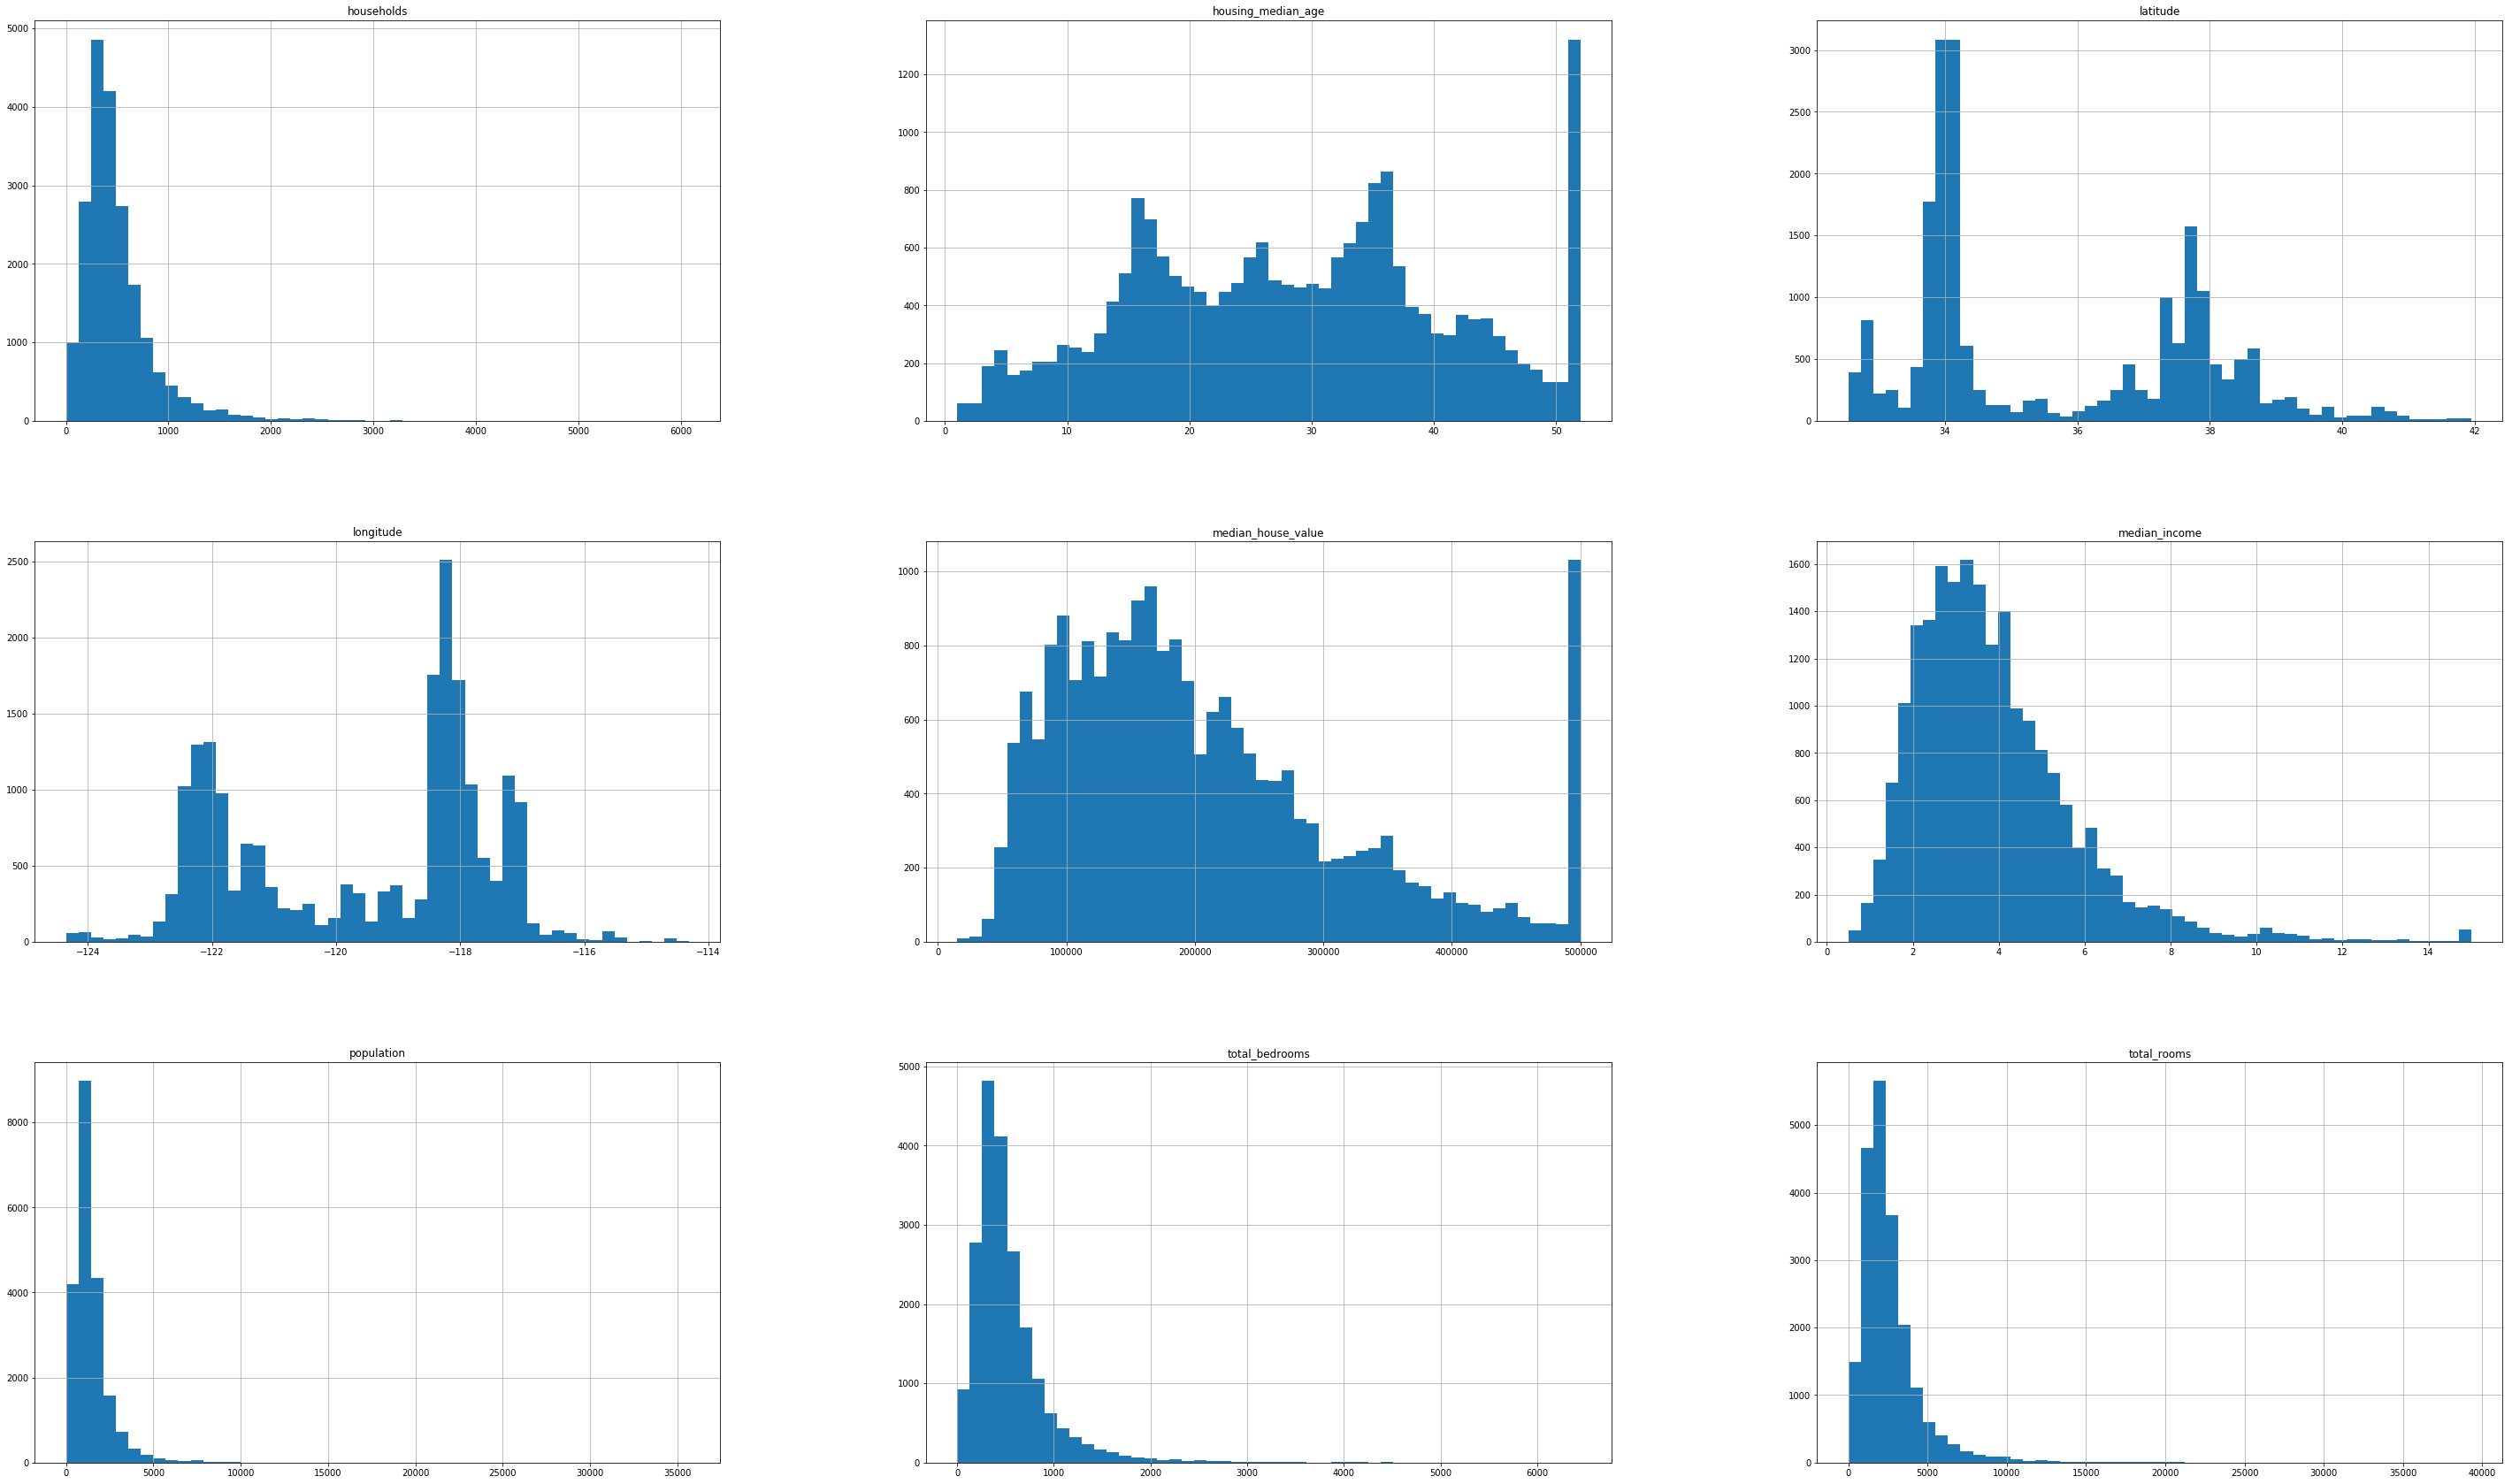

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
housing.hist(bins=50, figsize=(50, 30)) # histogram 그리기
plt.show()

## 3. 테스트 세트 만들기

### 3-1. 무작위 샘플링

In [19]:
import numpy as np

In [20]:
np.random.permutation(len(housing))
# 인덱스들이 섞여있는 것을 확인할 수 있다.

array([18807, 14084, 11267, ..., 10075, 17807, 12508])

In [22]:
len(housing)*0.8

16512.0

In [24]:
import numpy as np

np.random.seed(1992) # 항상 같은 테스트 셋이 나오도록
# random seed 설정 

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # 인덱스 셔플 (0~data의 길이만큼 random하게)
    # 인덱스별로 shuffle 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] # test_set_size까지. random 배열을 가져옴.
    train_indices = shuffled_indices[test_set_size:] # 나머지.
    return data.iloc[train_indices], data.iloc[test_indices]


##### 주의사항: 데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 함. (뇌가 오버피팅 되어 특정 모델을 선택하는 것을 막자.)

In [25]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), 'train +', len(test_set), 'test')


16512 train + 4128 test


#### 순수 무작위 샘플링 - (데이터셋이 충분히 크면 괜찮지만, 샘플링 편향 위험성)  => 계층적 샘플링이 필요

### 3-2. 층화추출법 (계층적 샘플링)

##### 계층적 샘플링: 테스트세트가 전체 모집단을 대표하도록 샘플링. (예. 남여 비율이 70:30 이라면 테스트셋도 마찬가지 비율로)

##### median_income을 기준으로 샘플링.  => income_cat이라는 컬럼으로
median_income 이 평균적이기 때문에 이를 기준으로 층화추출시작

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
# 계층적 샘플링을 위한 income_cat
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)  # income의 카테고리 수 제한
# 히스토그램을 확인했을때, 뒤쪽은 표본수가 적음. 따라서 카테고리수를 제한해준다. 

# where절 사용법: 
# where(cond, other, inplace): cond가 True => 원래값 유지, cond가 False면 other로 설정 함. inplace가 True면 중복값 덮어쓰기.
housing['income_cat'].where(housing['income_cat'] < 6, 6.0, inplace=True) # 6보다 큰 카테고리는 6로 합치자. (소득 카테고리를 나눔)
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


In [29]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64

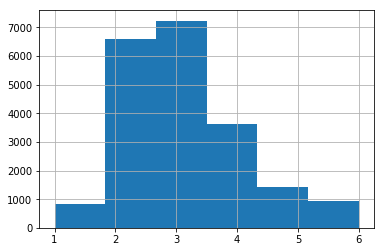

In [30]:
housing['income_cat'].hist(bins=6)

### 계층 샘플링 - sklearn-> StratifiedShuffleSplit

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
# 계층 추출법을 쉽게 만들어주는 StratifiedShyffleSplit

In [36]:
# StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1992)
split

StratifiedShuffleSplit(n_splits=1, random_state=1992, test_size=0.2,
            train_size=None)

In [38]:
# split.split => generator
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

#### 비율 비교

In [39]:
original_strat_ratio = housing['income_cat'].value_counts() / len(housing)
print("모집단 비율")
print(original_strat_ratio)

print("\n 테스트 비율")
test_strat_ratio = strat_test_set['income_cat'].value_counts()/len(strat_test_set)
print(test_strat_ratio)

print("\n 층화추출법: 모집단 비율 - 샘플링 비율")
print(abs(original_strat_ratio - test_strat_ratio))

모집단 비율
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64

 테스트 비율
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.069041
6.0    0.045543
1.0    0.039729
Name: income_cat, dtype: float64

 층화추출법: 모집단 비율 - 샘플링 비율
3.0    0.000048
2.0    0.000048
4.0    0.000048
5.0    0.000097
6.0    0.000048
1.0    0.000097
Name: income_cat, dtype: float64


In [40]:
# 만약 무작위 샘플링이라면
shuffle_test = split_train_test(housing, 0.2)[1]

o_shuffle_ratio = housing['income_cat'].value_counts() / len(housing)
print("모집단 비율")
print(o_shuffle_ratio)
print()

t_shuffle_ratio = shuffle_test['income_cat'].value_counts()/len(shuffle_test)
print("\n 테스트 비율")
print(t_shuffle_ratio)

print()
print("\n 무작위 추출법: 모집단 비율 - 샘플링 비율")
print(abs(o_shuffle_ratio-t_shuffle_ratio))

모집단 비율
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64


 테스트 비율
3.0    0.351744
2.0    0.318314
4.0    0.177568
5.0    0.071705
6.0    0.041424
1.0    0.039244
Name: income_cat, dtype: float64


 무작위 추출법: 모집단 비율 - 샘플링 비율
3.0    0.001163
2.0    0.000533
4.0    0.001260
5.0    0.002762
6.0    0.004070
1.0    0.000581
Name: income_cat, dtype: float64


In [41]:
# income cat 삭제. (표본 나눴으니.)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 4. 데이터 이해를 위한 탐색과 시각화

In [43]:
housing = strat_train_set.copy() # 훈련 셋 손상시키지 않기 위한 복사본

### 4-1. 위치데이터 시각화

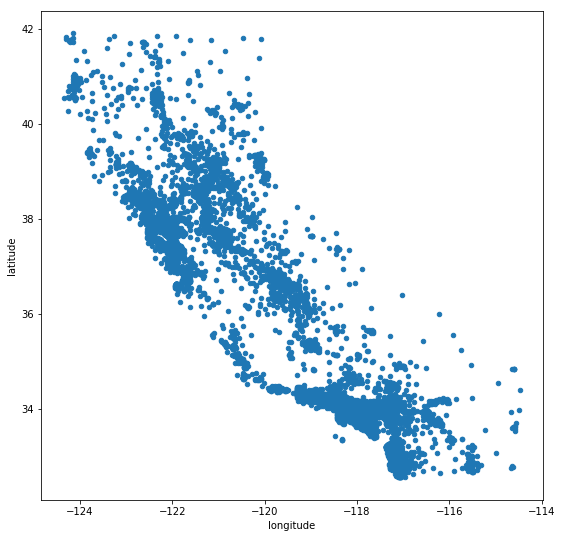

In [44]:
import matplotlib.image as mpimg

housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9, 9))
housing_plot.set_xlabel('longitude')
housing_plot.set_ylabel('latitude')
plt.show()


In [45]:
# 지도 출처: https://upload.wikimedia.org/wikipedia/commons/archive/f/f9/20090605191745%21USA_California_location_map.svg
map_img = mpimg.imread('datasets/housing/califonia.png')

housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9, 9))
housing_plot.set_xlabel('경도')
housing_plot.set_ylabel('위도')
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/housing/califonia.png'

##### 밀집도 추가

NameError: name 'map_img' is not defined

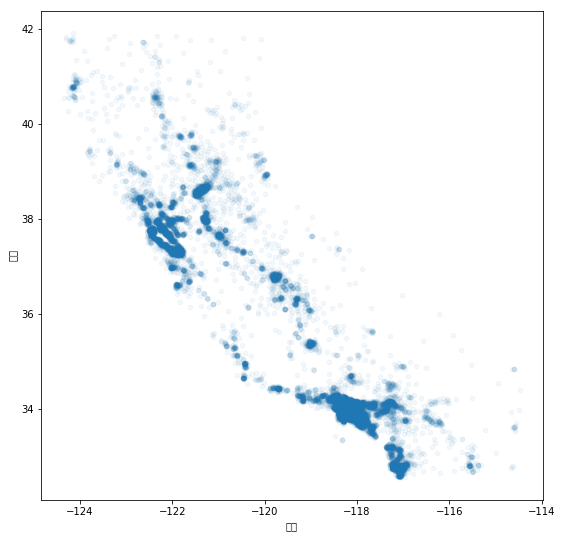

In [46]:
housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.05, figsize=(9, 9))
housing_plot.set_xlabel('경도')
housing_plot.set_ylabel('위도')
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)

plt.show()

### 데이터 추가하기(집 가격, 인구수)

NameError: name 'map_img' is not defined

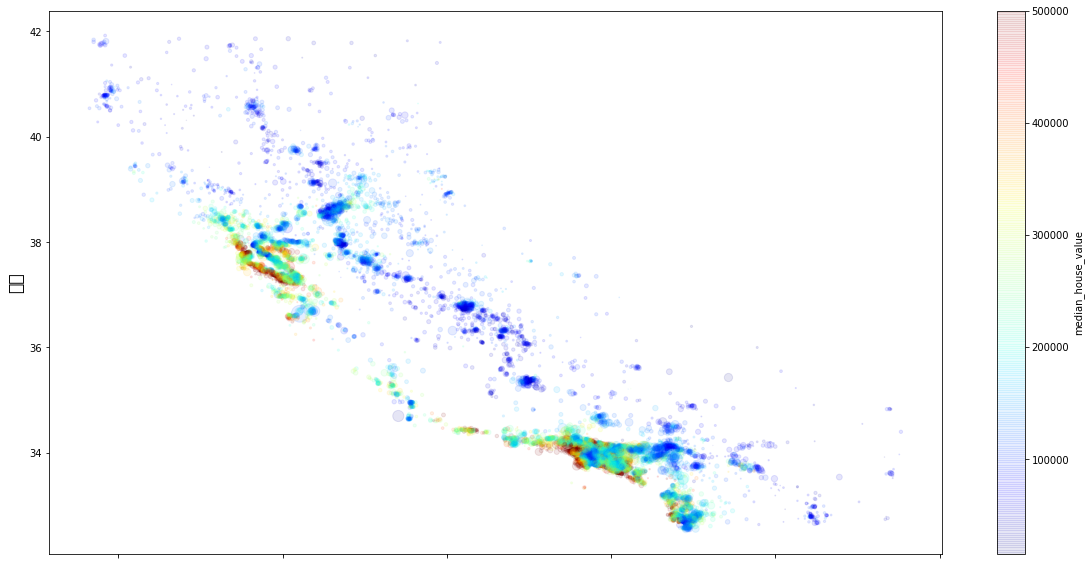

In [47]:
from matplotlib import pyplot  as plt


housing_plot = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
                            s=housing['population']/100, c="median_house_value", 
                            cmap=plt.get_cmap("jet"), colorbar=True,  figsize=(20,10))

housing_plot.set_xlabel('경도', fontsize='xx-large')
housing_plot.set_ylabel('위도', fontsize='xx-large')
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)


plt.legend(('인구',), fontsize='xx-large')

### 4-2. 상관관계 조사

#### 표준 상관계수: Standard correlation coefficient - 피어슨 r (corr())

In [51]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924438,-0.108023,0.047685,0.072321,0.103630,0.058708,-0.017332,-0.047076
latitude,-0.924438,1.000000,0.012472,-0.039990,-0.070690,-0.113390,-0.075454,-0.078271,-0.144242
housing_median_age,-0.108023,0.012472,1.000000,-0.361266,-0.322695,-0.304132,-0.305004,-0.116803,0.107335
total_rooms,0.047685,-0.039990,-0.361266,1.000000,0.931070,0.868203,0.918601,0.199215,0.131752
total_bedrooms,0.072321,-0.070690,-0.322695,0.931070,1.000000,0.888388,0.980053,-0.003980,0.049782
population,0.103630,-0.113390,-0.304132,0.868203,0.888388,1.000000,0.916891,0.010227,-0.022580
households,0.058708,-0.075454,-0.305004,0.918601,0.980053,0.916891,1.000000,0.016333,0.066348
median_income,-0.017332,-0.078271,-0.116803,0.199215,-0.003980,0.010227,0.016333,1.000000,0.684438
median_house_value,-0.047076,-0.144242,0.107335,0.131752,0.049782,-0.022580,0.066348,0.684438,1.000000


In [52]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684438
total_rooms           0.131752
housing_median_age    0.107335
households            0.066348
total_bedrooms        0.049782
population           -0.022580
longitude            -0.047076
latitude             -0.144242
Name: median_house_value, dtype: float64

In [53]:
attributes = ['housing_median_age', "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
corr_matrix[attributes]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,-0.108023,0.047685,0.072321,0.103630,0.058708,-0.017332,-0.047076
latitude,0.012472,-0.039990,-0.070690,-0.113390,-0.075454,-0.078271,-0.144242
housing_median_age,1.000000,-0.361266,-0.322695,-0.304132,-0.305004,-0.116803,0.107335
total_rooms,-0.361266,1.000000,0.931070,0.868203,0.918601,0.199215,0.131752
total_bedrooms,-0.322695,0.931070,1.000000,0.888388,0.980053,-0.003980,0.049782
population,-0.304132,0.868203,0.888388,1.000000,0.916891,0.010227,-0.022580
households,-0.305004,0.918601,0.980053,0.916891,1.000000,0.016333,0.066348
median_income,-0.116803,0.199215,-0.003980,0.010227,0.016333,1.000000,0.684438
median_house_value,0.107335,0.131752,0.049782,-0.022580,0.066348,0.684438,1.000000


In [54]:
%matplotlib inline

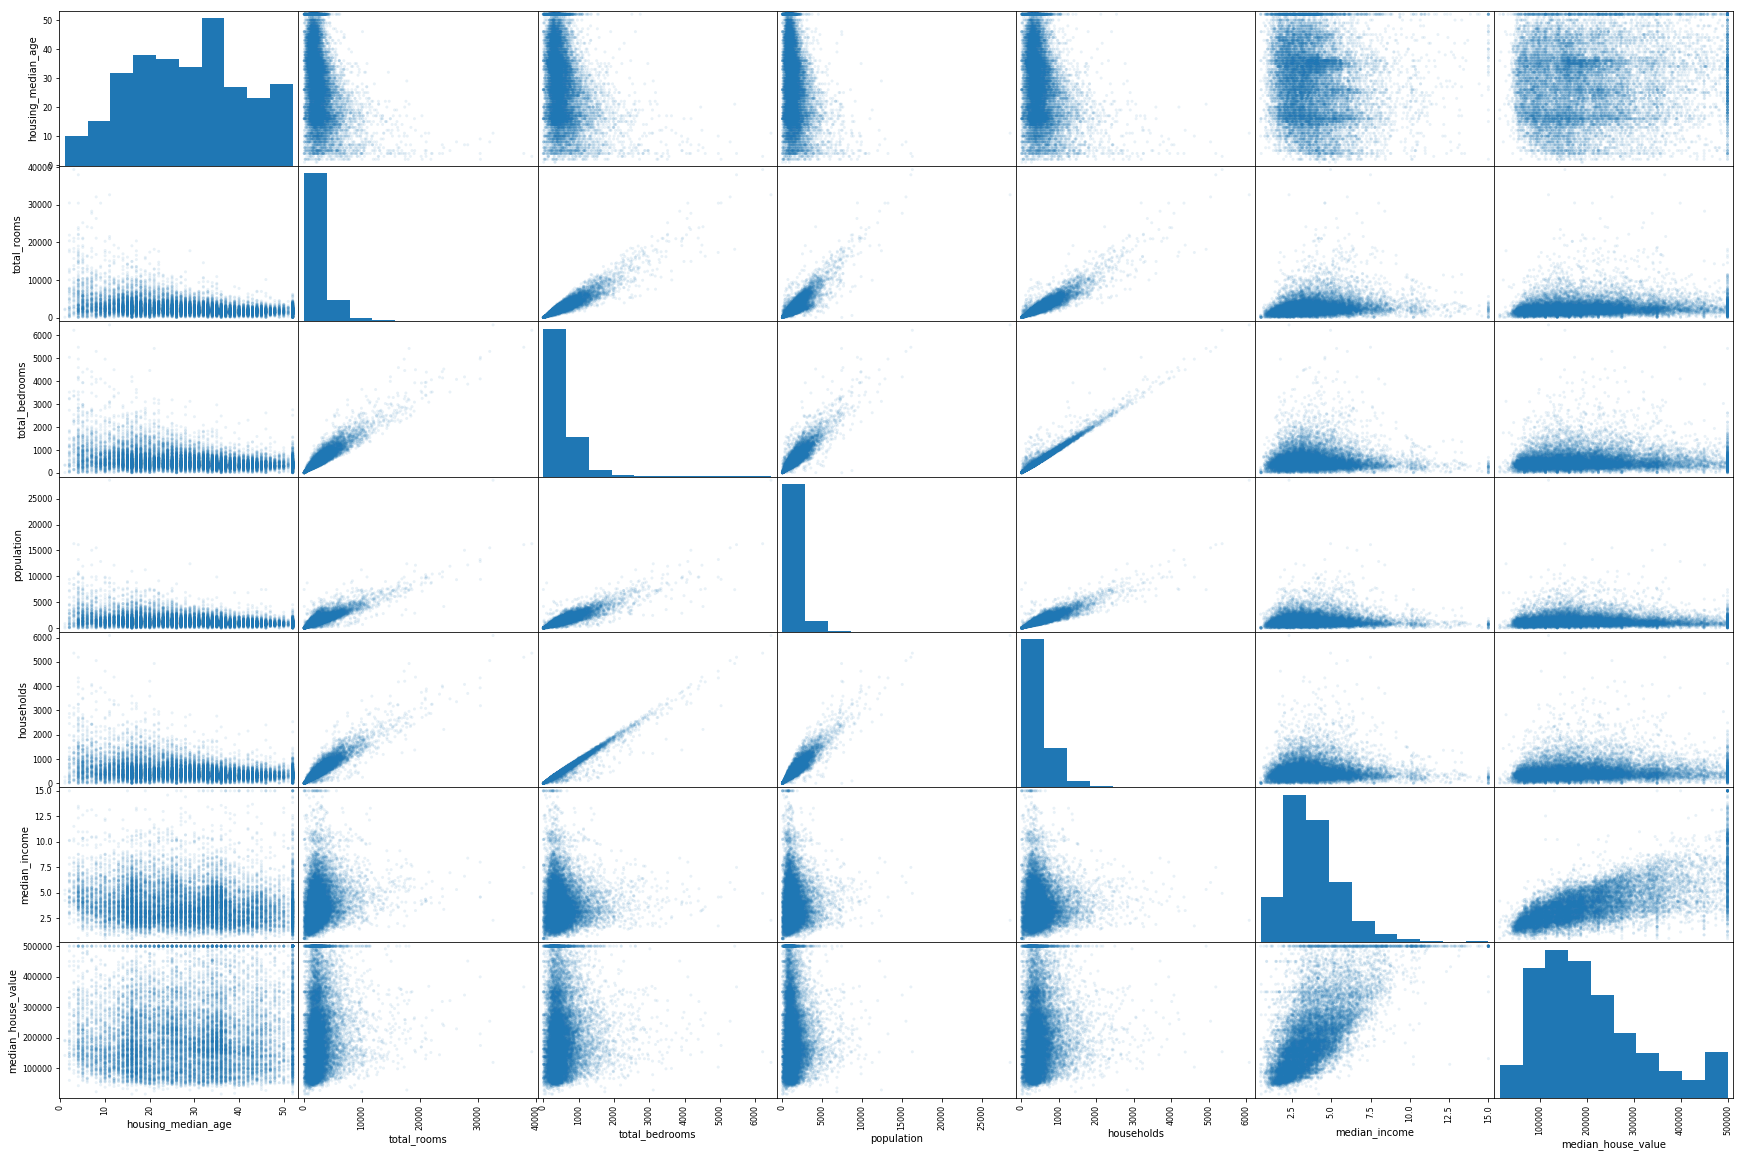

In [55]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[attributes], figsize=(30, 20), alpha=0.1)
plt.show()


In [ ]:
# median_income 과 median_house_value가 상관관계

### 4-3. 특성 조합

In [56]:
housing['rooms_per_houshold'] = housing['total_rooms']/housing['households'] # 가구당 방 개수
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] # 전체 방당 침실개수
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households'] # 가구당 침실개수
housing['population_per_household'] = housing['population']/housing['households'] # 평균 한 가구 인원

In [57]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

# 추가 특성
# rooms_per_houshold , bedrooms_per_room 가 다른 특성보다 상관관계가 높은편!

median_house_value          1.000000
median_income               0.684438
rooms_per_houshold          0.149362
total_rooms                 0.131752
housing_median_age          0.107335
households                  0.066348
total_bedrooms              0.049782
population                 -0.022580
population_per_household   -0.027311
longitude                  -0.047076
bedrooms_per_household     -0.054344
latitude                   -0.144242
bedrooms_per_room          -0.250824
Name: median_house_value, dtype: float64

## 5. 데이터처리 - 머신러닝 알고리즘 위한 데이터 준비

In [58]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
# housing복사본 만듬 -> 예측 변수만 분리

In [59]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1729 to 2599
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16345 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### 5-0. 데이터 이해하기

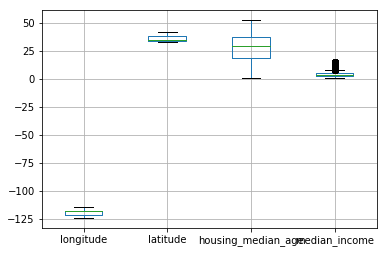

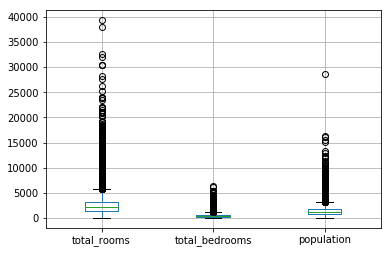

In [60]:
# boxplot
plt.figure(1)
box_plot_attr = ['longitude', 'latitude', 'housing_median_age', 'median_income']
housing.boxplot(box_plot_attr, figsize=(9,9))

plt.figure(2)
box_plot_attr2 = ['total_rooms', 'total_bedrooms', 'population']
housing.boxplot(box_plot_attr2, figsize=(9,9))


In [64]:
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1,-0.924438,-0.108023,0.047685,0.0723211,0.10363,0.0587084,-0.0173323
latitude,-0.924438,1,0.0124715,-0.0399896,-0.0706898,-0.11339,-0.0754535,-0.0782712
housing_median_age,-0.108023,0.0124715,1,-0.361266,-0.322695,-0.304132,-0.305004,-0.116803
total_rooms,0.047685,-0.0399896,-0.361266,1,0.93107,0.868203,0.918601,0.199215
total_bedrooms,0.0723211,-0.0706898,-0.322695,0.93107,1,0.888388,0.980053,-0.00397959
population,0.10363,-0.11339,-0.304132,0.868203,0.888388,1,0.916891,0.0102275
households,0.0587084,-0.0754535,-0.305004,0.918601,0.980053,0.916891,1,0.0163327
median_income,-0.0173323,-0.0782712,-0.116803,0.199215,-0.00397959,0.0102275,0.0163327,1


###  5-1. 결측값 처리

##### 5-1-1. 삭제

In [65]:
# 삭제
# housing.dropna(subset=['total_bedrooms']) 
housing.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16345 entries, 1729 to 2599
Data columns (total 9 columns):
longitude             16345 non-null float64
latitude              16345 non-null float64
housing_median_age    16345 non-null float64
total_rooms           16345 non-null float64
total_bedrooms        16345 non-null float64
population            16345 non-null float64
households            16345 non-null float64
median_income         16345 non-null float64
ocean_proximity       16345 non-null object
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [66]:
# 열 제거
housing.drop('total_bedrooms', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1729 to 2599
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


##### 5-1-2. 대표값으로 대체

In [67]:
# 대표값으로 대체

# median = housing['total_bedrooms'].median() # option3: 중간값 채우기
# housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)
# housing.info()
median = housing.median()
# print(housing.fillna(median).describe())
housing.fillna(median).info()


# housing.info()
# 중간값 계산할 경우. 저장해 놓아야함( 테스트셋에서도 누락된 값을 바꾸고, 실제 운영시에도 바꿔야 함.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1729 to 2599
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


##### 5-1-2. 부록: imputer 사용하기

In [68]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [69]:
# imputer 사용하기: 수치형 특성에서만 계산될 수 있음.
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [70]:
# imputer의 statistics에 저장됨.! (새로운 데이터에서 어떤 값이 누락될지 모르므로, 모든 수치형 특성에 imputer를 적용하자)
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  433.     ,
       1158.     ,  408.     ,    3.53895])

In [71]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  433.     ,
       1158.     ,  408.     ,    3.53895])

In [72]:
#imputer 객체로 훈련세트에서 누락된 값을 학습한 중간값으로 변경 
X = imputer.transform(housing_num)
X
# => 결과는 numpy 배열 (housing_num에서 변형된 특성) => pandas로 만들기

array([[-1.2234e+02,  3.7980e+01,  3.3000e+01, ...,  1.3540e+03,
         4.2700e+02,  3.9773e+00],
       [-1.1781e+02,  3.3750e+01,  2.5000e+01, ...,  1.1970e+03,
         4.5800e+02,  3.7031e+00],
       [-1.2246e+02,  3.7640e+01,  1.7000e+01, ...,  2.1500e+03,
         6.6600e+02,  4.5938e+00],
       ...,
       [-1.1834e+02,  3.3840e+01,  3.6000e+01, ...,  6.7600e+02,
         2.3100e+02,  5.2690e+00],
       [-1.1847e+02,  3.3990e+01,  5.2000e+01, ...,  1.0950e+03,
         5.7000e+02,  2.8514e+00],
       [-1.2372e+02,  4.1090e+01,  1.9000e+01, ...,  1.1660e+03,
         3.6300e+02,  1.8208e+00]])

In [73]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))
housing_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1729,-122.34,37.98,33.0,2014.0,410.0,1354.0,427.0,3.9773
11004,-117.81,33.75,25.0,2365.0,471.0,1197.0,458.0,3.7031
16819,-122.46,37.64,17.0,3523.0,669.0,2150.0,666.0,4.5938
4454,-118.17,34.10,37.0,299.0,89.0,318.0,92.0,1.3125
13166,-121.38,36.84,17.0,2625.0,512.0,1487.0,481.0,3.6354
11677,-118.00,33.86,32.0,1162.0,196.0,563.0,178.0,3.8750
13590,-117.29,34.11,48.0,1498.0,448.0,1586.0,455.0,1.1687
4382,-118.26,34.09,36.0,3503.0,833.0,2652.0,788.0,3.8448
19239,-122.63,38.50,19.0,2107.0,332.0,874.0,341.0,5.7819
11094,-117.88,33.84,26.0,1499.0,290.0,755.0,277.0,3.5893


##### 5-1-3. 예측값 삽입 (Feature를 위한 머신러닝)

In [74]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000
mean,-119.569701,35.629836,28.681383,2637.977713,538.037565,1422.433079,499.391776,3.868704
std,2.004568,2.136460,12.570062,2217.341909,426.091289,1121.946299,385.950713,1.898658
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1440.750000,294.000000,784.000000,278.000000,2.556200
50%,-118.500000,34.260000,29.000000,2118.000000,433.000000,1158.000000,408.000000,3.538950
75%,-118.010000,37.710000,37.000000,3142.000000,646.000000,1720.000000,602.000000,4.746850
max,-114.470000,41.920000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100


### 5-2. 텍스트와 범주형 특성 다루기

##### 5-2-1. LabelEncoding 예시

In [75]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

1729       NEAR BAY
11004     <1H OCEAN
16819    NEAR OCEAN
4454      <1H OCEAN
13166        INLAND
11677     <1H OCEAN
13590        INLAND
4382      <1H OCEAN
19239     <1H OCEAN
11094     <1H OCEAN
Name: ocean_proximity, dtype: object

In [76]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7291
INLAND        5233
NEAR OCEAN    2158
NEAR BAY      1825
ISLAND           5
Name: ocean_proximity, dtype: int64

In [78]:
# 머신러닝 알고리즘은 대부분 숫자형을 다룸 -> 각 카테고리를 다른 정숫값으로 매핑
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]


array([0, 1, 2, 1, 3, 1, 3, 1, 1, 1], dtype=int64)

In [79]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')


##### 5-2-2. OnehotEncoding 예시

In [80]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### 5-3. feature scaling

In [81]:
# 스케일링을 비슷하게 만들어준다. (0~1사이에 위치하도록)
# 1. min-max 스케일링: (data-min_value)/(max_value-min_value) 
# MinMaxScaler변환기

# 2. 표준화: (data-mean)/std ==> 분산이 1이 됨: 평균이 0이 됨
# StandardScaler 변환기
# 범위의 상한과 하한이 없어서 신경망에서는 사용 못함.
# 그러나 표준화는 이상치에 영향을 덜 받음.

# 만약 중간소득을 실수로 100이라고 입력한 구역이 있으면,,,, 
# min-max는 0~15사이에 모든 값을 0~0.15로 만듬
# 표준화는 크게 영향 받지 않음(평균으로 하기 때문에.)

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000
mean,-119.569701,35.629836,28.681383,2637.977713,538.037565,1422.433079,499.391776,3.868704
std,2.004568,2.136460,12.570062,2217.341909,426.091289,1121.946299,385.950713,1.898658
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1440.750000,294.000000,784.000000,278.000000,2.556200
50%,-118.500000,34.260000,29.000000,2118.000000,433.000000,1158.000000,408.000000,3.538950
75%,-118.010000,37.710000,37.000000,3142.000000,646.000000,1720.000000,602.000000,4.746850
max,-114.470000,41.920000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100


##### 5-3-1. min-max scaling (min-max normalization)

In [82]:
from sklearn.preprocessing import MinMaxScaler

A = MinMaxScaler().fit_transform(housing.drop('ocean_proximity',axis=1))
min_max_columns = housing.columns.copy().drop('ocean_proximity')

min_max_housing = pd.DataFrame(A, columns=min_max_columns, index=housing.index)

min_max_housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000
mean,0.483836,0.328691,0.542772,0.067043,0.083339,0.049695,0.081959,0.232328
std,0.202892,0.228011,0.246472,0.056395,0.066122,0.039280,0.063468,0.130940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258097,0.147279,0.333333,0.036593,0.045469,0.027343,0.045552,0.141812
50%,0.592105,0.182497,0.549020,0.053818,0.067039,0.040437,0.066930,0.209587
75%,0.641700,0.550694,0.705882,0.079862,0.100093,0.060113,0.098832,0.292889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 5-3-2. Standardization

In [83]:
from sklearn.preprocessing import StandardScaler

B = StandardScaler().fit_transform(housing.drop('ocean_proximity',axis=1))
std_columns = housing.columns.copy().drop('ocean_proximity')

std_housing = pd.DataFrame(B, columns=std_columns, index=housing.index)

std_housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.634500e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,2.428021e-15,-3.620597e-16,3.888336e-17,6.691797e-17,-1.205555e-16,-8.949122e-17,2.336162e-17,4.584242e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.384775e+00,-1.441604e+00,-2.202234e+00,-1.188837e+00,-1.260420e+00,-1.265191e+00,-1.291374e+00,-1.774362e+00
25%,-1.112642e+00,-7.956563e-01,-8.497736e-01,-5.399546e-01,-5.727529e-01,-5.690579e-01,-5.736444e-01,-6.913008e-01
50%,5.336477e-01,-6.411905e-01,2.534804e-02,-2.345121e-01,-2.465218e-01,-2.356985e-01,-2.368037e-01,-1.736826e-01
75%,7.780967e-01,9.736791e-01,6.618001e-01,2.273161e-01,2.533864e-01,2.652319e-01,2.658664e-01,4.625229e-01
max,2.544116e+00,2.944288e+00,1.855148e+00,1.654374e+01,1.386356e+01,2.419402e+01,1.446500e+01,5.862949e+00


### 5-4. 변환 파이프라인

##### 5-4-1. 변환기 만들기

In [84]:
# 변환기 만들기
# fit과 transform
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx]/X[:, household_idx]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

# 모든 파이프라인은 (이름, 추정기)
# 마지막 단계에서는 반드시 fit_transform()메소드를 가지고 있어야 함
# 파이프라인이 하나씩 호출하면서 출력을 다음 단계의 입력으로 전달함.

array([[-1.38203471e+00,  1.10006019e+00,  3.43574077e-01, ...,
        -3.00342609e-01,  1.04471756e-02, -1.62534556e-01],
       [ 8.77871835e-01, -8.79910379e-01, -2.92878001e-01, ...,
        -1.12415168e-01, -4.12132566e-02, -2.32658128e-01],
       [-1.44189979e+00,  9.40913616e-01, -9.29330079e-01, ...,
        -5.94430471e-02,  1.57546196e-02, -3.79537109e-01],
       ...,
       [ 6.13467758e-01, -8.37783345e-01,  5.82243606e-01, ...,
         2.77266708e-01, -1.22173460e-02, -7.87461819e-01],
       [ 5.48613927e-01, -7.67571623e-01,  1.85514776e+00, ...,
        -6.84863051e-01, -1.05390808e-01,  1.16133637e+00],
       [-2.07048306e+00,  2.55578322e+00, -7.70217060e-01, ...,
        -1.77487126e-03,  1.42618658e-02,  7.86864892e-02]])

##### 데이터프레임 셀렉터 클래스 - 파이프라인 처리하기

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    데이터프레임에서 필요한 속성만 셀렉트하도록
    """
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

##### 5-4.2 파이프라인 연결하기

In [87]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder',  OneHotEncoder(categories='auto',sparse=False)),
])



In [88]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])
full_pipeline

FeatureUnion(n_jobs=None,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('imputer', SimpleImputer(copy=True, fill_value=None, m...     dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False))]))],
       transformer_weights=None)

In [89]:
# pipeline 실행
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.38203471,  1.10006019,  0.34357408, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87787183, -0.87991038, -0.292878  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.44189979,  0.94091362, -0.92933008, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.61346776, -0.83778335,  0.58224361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54861393, -0.76757162,  1.85514776, ...,  0.        ,
         0.        ,  0.        ],
       [-2.07048306,  2.55578322, -0.77021706, ...,  0.        ,
         0.        ,  0.        ]])

In [90]:
housing_prepared.shape

(16512, 16)

In [91]:
housing_prepared

array([[-1.38203471,  1.10006019,  0.34357408, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87787183, -0.87991038, -0.292878  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.44189979,  0.94091362, -0.92933008, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.61346776, -0.83778335,  0.58224361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54861393, -0.76757162,  1.85514776, ...,  0.        ,
         0.        ,  0.        ],
       [-2.07048306,  2.55578322, -0.77021706, ...,  0.        ,
         0.        ,  0.        ]])

## 6. 모델 선택과 훈련

우린 다음을 수행했음
1. 문제 정의
2. 데이터 읽고 탐색
3. 훈련세트와 테스트 세트 나누고
4. 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하고 준비하기 위해 변환 파이프라인 작성
5. ---- 머신러닝 모델 선택하고 훈련하자

#### 훈련하기1 - LinearRegression

In [92]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 훈련평가하기1 - LinearRegression

In [93]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("예측: ", lin_reg.predict(some_data_prepared))
print("레이블: ", list(some_labels))

# 그닥 정확한 예측은 아니지만. 작동은 함

예측:  [226155.62884341 210041.19976504 250694.62210311 131208.85620517
 170326.14767649 212522.672065    68999.64705193 215951.55075459
 286257.00332807 199720.62444263]
레이블:  [131300.0, 227800.0, 251200.0, 145800.0, 221200.0, 203000.0, 70800.0, 241400.0, 265600.0, 238500.0]


In [94]:
# 전체 MSE측정
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
# 이렇게 평가가 끝났음. => 좋은 점수가 아님. (과소적합!) 
# 이유는?: 모델이 안 좋거나, 특성들이 충분한 정보를 제공하지 못했거나.
# 해결책은?: 모델은 바꾸거나 더 좋은 특성을 주입하거나 모델의 규제를 감소시키거나

# dir(lin_reg)
# lin_reg.normalize

68243.06894472326


#### 훈련하기2 - DecisionTreeRegressor

In [95]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### 훈련평가하기2 - DecisionTreeRegressor

In [96]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## 과대적합... 
# 확신이 들기전까지는 테스트 셋 사용하지 말고, 
# 훈련은 훈련셋에 일부로, 나머지는 모델 검증에 사용

0.0

#### 훈련평가하기2-2. k-fold cross-validation (교차 검증) DecisionTree

In [97]:
# cv개로 나눠서 10번 훈련하고 평가하는데 
# 1개는 돌아가면서 검증 세트로
# 그 외 나머지는 훈련세트로 하여
# 스코어를 정함.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([74463.2411129 , 72202.8207039 , 74044.89790038, 67782.78282607,
       75217.15217552, 73162.19516427, 70013.43981418, 75434.25808902,
       66166.64857067, 70778.92849913])

In [98]:
tree_rmse_scores.mean()

71926.63648560256

In [99]:
tree_rmse_scores.std()

3016.31761098425

#### 훈련평가하기1-2. k-fold cross-validation (교차 검증)  LinearRegression

In [100]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([71020.67995471, 69653.63703632, 69469.29169114, 68690.2885137 ,
       69427.56576157, 66799.00038698, 66180.34054232, 69714.62745444,
       66774.21987997, 66130.64831096])

In [101]:
lin_rmse_scores.mean()

68386.02995321222

In [102]:
lin_rmse_scores.std()

1665.3111558576375

#### 훈련하기3 - RandomForestRegressor
- 특성을 무작위로 선택해서 많은 결정 트리를 만들고 예측을 평균냄

In [103]:
# 앙상블 학습: 여러 다른 모델을 모아서 하나의 모델을 만드는 것
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### 훈련평가하기3 - RandomForestRegressor

In [104]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22072.43307042145

#### 훈련평가하기3-2. k-fold cross-validation (교차 검증)  RandomForestRegressor

In [105]:
forest_mse_score = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_score = np.sqrt(-forest_mse_score)
forest_rmse_score

array([55991.40542194, 53178.6890027 , 52579.24608774, 52091.86614133,
       54695.57540936, 52051.60956958, 50005.10934806, 53703.40786701,
       51691.78236656, 51546.92011627])

In [106]:
forest_rmse_score.mean()

# 역시 과대 적합 - 그래도 훨씬 나음

52753.561133055875

In [107]:
forest_rmse_score.std()

1625.924460526437

##### 과대적합 해결하기: 모델 간단히 하기 or regualrization or 더 많은 data
--> 가능성 있는 2~5개의 모델을 선정하는 것이 목적

***Tip:** pickle패키지나 joblib을 사용하여 사이킷런 모델을 간단하게 저장하자.

## 8. 모델 세뷰 튜닝
가능성 있는 모델들을 추렸다고 가정. -> 세부 튜닝해야 함

###  8-1-1. 그리드 탐색
단순한 방법: 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터를 조정하는 것.
- sklearn.model_selection import GridSearchCV
-> 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용함.
- 비교적 적은 수의 조합을 탐구할 때 괜찮음

##### RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합을 그리드 탐색

In [108]:
from sklearn.model_selection import GridSearchCV

# param_grid에 대한 첫번째 dict에 있는 하이퍼 파라미터의 조합을 시도,, 
# 그다음 두번째 dict에 대한 하이퍼 파라미터에 대한 조합을 시도
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}    
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [109]:
# 최적의 조합
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [110]:
# 최적의 추정기
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [111]:
# cv 결과
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([0.05720325, 0.17200985, 0.51642947, 0.08540506, 0.27521582,
        0.81864691, 0.12280693, 0.38322201, 1.13926525, 0.14680843,
        0.47942748, 1.44488254, 0.08340473, 0.27221551, 0.10860629,
        0.35442033, 0.13360763, 0.4424253 ]),
 'std_fit_time': array([0.00746768, 0.00334685, 0.0044544 , 0.00185491, 0.0044455 ,
        0.00398014, 0.00248213, 0.00360017, 0.00673547, 0.00278578,
        0.00500422, 0.01036209, 0.0010199 , 0.00348727, 0.00338241,
        0.0045435 , 0.00135662, 0.00574831]),
 'mean_score_time': array([0.00300012, 0.00900054, 0.02500148, 0.00300007, 0.00900044,
        0.02460136, 0.00360031, 0.00880046, 0.02500138, 0.0032002 ,
        0.00860047, 0.02500148, 0.00360022, 0.00980067, 0.00360017,
        0.01020064, 0.00320015, 0.00980053]),
 'std_score_time': array([1.16800773e-07, 1.50789149e-07, 1.78416128e-07, 9.53674316e-08,
        1.16800773e-07, 4.89998722e-04, 4.89842988e-04, 4.00042545e-04,
        6.32485093e-04, 3.99994861e-

In [112]:
# 평가 점수
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
    
# 살짝 낫쥬?

63429.855013662054 {'max_features': 2, 'n_estimators': 3}
55856.47091355042 {'max_features': 2, 'n_estimators': 10}
52914.083750474565 {'max_features': 2, 'n_estimators': 30}
60712.472890062985 {'max_features': 4, 'n_estimators': 3}
52952.73951032448 {'max_features': 4, 'n_estimators': 10}
50782.40652541816 {'max_features': 4, 'n_estimators': 30}
59915.90391068843 {'max_features': 6, 'n_estimators': 3}
51771.15665471614 {'max_features': 6, 'n_estimators': 10}
50390.17816515406 {'max_features': 6, 'n_estimators': 30}
60104.98711159479 {'max_features': 8, 'n_estimators': 3}
52452.390307543894 {'max_features': 8, 'n_estimators': 10}
50442.767767111625 {'max_features': 8, 'n_estimators': 30}
61814.424187451295 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54249.98714992908 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59939.59389744204 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52905.27262814161 {'bootstrap': False, 'max_features': 3, 'n_estimator

###  8-1-2. 랜덤 탐색
- 하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV
- 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가.

장점:
1. 랜덤 탐색 1,000회 반복시 하이퍼파라미터마다 각기 다른 1,000개의 값 탐색 (그리드는 몇개의 값만 탐색)
2. 단순히 반복 횟수를 조절 -> 컴퓨팅 자원을 제어할 수 있음

###  8-3. 앙상블 방법
- 최상의 모델을 연결해보기. (결정 트리의 앙상블인 랜덤 포레스트가 결정 트리 하나보다 더 성능이 좋은 것처럼)

###  8-4. 최상의 모델과 오차 분석
- 최상의 모델을 분석하면 문제에 대한 좋은 통찰력 얻을 수 있음.
- RandomForestRegressor가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려줌.


In [113]:
# feature에 대한 중요도를 확인할 수 있음.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.27940462e-02, 6.81550555e-02, 4.10223027e-02, 1.68214089e-02,
       1.60995984e-02, 1.73475841e-02, 1.54482489e-02, 3.06440433e-01,
       5.99924166e-02, 1.08616578e-01, 1.02748806e-01, 1.61364629e-02,
       1.39424783e-01, 1.79581307e-04, 3.00953766e-03, 5.76315762e-03])

In [114]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_one_hot_attribs = list(housing_categories)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

# 중요도가 확연히 보이쥬?

[(0.3064404327804564, 'median_income'),
 (0.1394247828434356, '<1H OCEAN'),
 (0.10861657774239183, 'population_per_household'),
 (0.10274880571881297, 'bedrooms_per_room'),
 (0.08279404623645895, 'longitude'),
 (0.06815505551862833, 'latitude'),
 (0.05999241663835621, 'rooms_per_household'),
 (0.04102230270299423, 'housing_median_age'),
 (0.017347584125688036, 'population'),
 (0.016821408884953877, 'total_rooms'),
 (0.016136462866894623, 'NEAR BAY'),
 (0.016099598444529337, 'total_bedrooms'),
 (0.01544824890529497, 'households'),
 (0.005763157623912011, 'ISLAND'),
 (0.0030095376598311876, 'INLAND'),
 (0.0001795813073613927, 'NEAR OCEAN')]

##  8-5. 테스트 셋으로 시스템 평가하기

In [115]:
# 테스트 셋에서 feature와 레이블을 얻은 후
# full_pipeline으로 데이터를 변환하고
# 최종 모델 평가

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse


46405.164477919934

##  9. 론칭, 모니터링, 유지보수

1. 모니터링 코드: 실시간 성능 체크 - 성능 떨어졌을시 알람
2. 시스템 예측 샘플링 및 평가 - 사람의 분석이 필요.
3. 입력 데이터 품질 평가 (시스템 입력을 모니터링 - 쓰레기가 들어가면 쓰레기가 나온다. (센서 고장 체크))
4. 새로운 데이터를 사용해 정기적으로 모델을 훈련 (자동화)